In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:


# Cargar el archivo (ajusta el nomre del archivo)
df = pd.read_excel(r"BROCOLI CONGELADO 2023.xlsx")
print(df.head())

                       RAZON SOCIAL  POTENCIAL UNO  NOMBRE COMERCIAL  \
0  NOVA ALIMENTOS ALIMENNOVASA S.A.            NaN               NaN   
1  NOVA ALIMENTOS ALIMENNOVASA S.A.            NaN               NaN   
2                    PROVEFRUT S.A.            NaN               NaN   
3                    PROVEFRUT S.A.            NaN               NaN   
4                    PROVEFRUT S.A.            NaN               NaN   

             RUC                   CONSIGNATARIO POSICION ARANCELARIA  \
0  1791404785001            IZUMI COSMO CO.,LTD.        0710.80.20.00   
1  1791404785001  SIEMSSEN TIEFKUHLPRODUKTE GMBH        0710.80.20.00   
2  1790971937001  SIEMSSEN TIEFK HLPRODUKTE GMBH        0710.80.20.00   
3  1790971937001            SNOW FRESH FOODS INC        0710.80.20.00   
4  1790971937001  SIEMSSEN TIEFK HLPRODUKTE GMBH        0710.80.20.00   

  DESCRIPCION POSICION                    DESCRIPCION DEL DESPACHO  \
0            --Brocoli         KG. BROCCOLI FLORETS IQF 20

In [3]:
print(df.shape) # Filas y Columnas
print(df.info()) # Información General

(6702, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   RAZON SOCIAL                        6702 non-null   object        
 1   POTENCIAL UNO                       0 non-null      float64       
 2   NOMBRE COMERCIAL                    0 non-null      float64       
 3   RUC                                 6702 non-null   int64         
 4   CONSIGNATARIO                       4655 non-null   object        
 5   POSICION ARANCELARIA                6702 non-null   object        
 6   DESCRIPCION POSICION                6702 non-null   object        
 7   DESCRIPCION DEL DESPACHO            6702 non-null   object        
 8   REFRENDO                            6702 non-null   int64         
 9   ITEM                                6702 non-null   int64         
 10  DAU          

In [4]:
print(df['TOTAL FOB U$S'].describe()) # Estadísticas

count     6437.000000
mean     48185.472613
std      16224.517251
min          1.550000
25%      30562.420000
50%      60000.000000
75%      60000.000000
max      83843.730000
Name: TOTAL FOB U$S, dtype: float64


In [5]:
df1 = df.dropna(axis=1, how="all") # axis = 1 elimina columnas vacías

In [6]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   RAZON SOCIAL                        6702 non-null   object        
 1   RUC                                 6702 non-null   int64         
 2   CONSIGNATARIO                       4655 non-null   object        
 3   POSICION ARANCELARIA                6702 non-null   object        
 4   DESCRIPCION POSICION                6702 non-null   object        
 5   DESCRIPCION DEL DESPACHO            6702 non-null   object        
 6   REFRENDO                            6702 non-null   int64         
 7   ITEM                                6702 non-null   int64         
 8   FECHA DESPACHO                      6702 non-null   datetime64[ns]
 9   FECHA EMBARQUE                      3972 non-null   datetime64[ns]
 10  REGIMEN                 

In [7]:
df1['CONTENEDORES'].head()

0    0
1    0
2    0
3    0
4    0
Name: CONTENEDORES, dtype: int64

In [8]:
import datetime as dt
df1["FECHA DESPACHO"] = pd.to_datetime(df1["FECHA DESPACHO"])

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_9472\2532574939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["FECHA DESPACHO"] = pd.to_datetime(df1["FECHA DESPACHO"])


In [9]:
df = df1[["FECHA DESPACHO","KGS NETO", "PAIS DESTINO", "ACTIVIDAD PRINCIPAL DEL EXPORTADOR","ESTADO MERCADERIA", "EMPRESA TRANSPORTE","ITEM","TOTAL FOB U$S"]]

In [10]:
entradallm = df1[["FECHA DESPACHO","KGS NETO", "PAIS DESTINO","FOB U$S", "ITEM"]]
entradallm["KGS_TOTAL"]= entradallm["KGS NETO"]*entradallm["ITEM"]
entradallm = entradallm.drop(["KGS NETO", "ITEM"],axis=1)
entradallm.head()
print(entradallm.shape)
x =[3,5,6]
print(x[1])


(6702, 4)
5


C:\Users\DIEGO\AppData\Local\Temp\ipykernel_9472\3195605636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entradallm["KGS_TOTAL"]= entradallm["KGS NETO"]*entradallm["ITEM"]


In [11]:
entradallm = entradallm.sort_values("FECHA DESPACHO")

In [12]:
entradallm["AÑO"] = entradallm["FECHA DESPACHO"].dt.year
entradallm["SEMANA"] = entradallm["FECHA DESPACHO"].dt.isocalendar().week
entradallm = entradallm.drop("FECHA DESPACHO",axis=1)
print(entradallm.head())


      PAIS DESTINO  FOB U$S  KGS_TOTAL   AÑO  SEMANA
218  UNITED STATES  60000.0    21200.0  2023      52
183  UNITED STATES  60000.0    21200.0  2023      52
184        GERMANY  60000.0    21200.0  2023      52
185  UNITED STATES  60000.0    21200.0  2023      52
186  UNITED STATES  60000.0    21200.0  2023      52


In [13]:
entradallm = entradallm.sort_values("SEMANA",ascending=True)
entradallm.head()

,PAIS DESTINO,FOB U$S,KGS_TOTAL,AÑO,SEMANA
98,MEXICO,21605.28,20000.0,2023,1
323,JAPAN,29930.39,15120.0,2023,1
284,JAPAN,36779.39,12600.0,2023,1
301,JAPAN,29930.39,15120.0,2023,1
294,RUSSIAN FEDERATION,21475.80,22140.0,2023,1


In [14]:
df_semanal = entradallm.groupby(["AÑO", "SEMANA", "PAIS DESTINO"]).sum().reset_index()
df_semanal.head()
df_semanal.shape

(562, 5)

In [15]:
Valores_reales = entradallm.loc[entradallm["SEMANA"]==52]
print(Valores_reales.head())

       PAIS DESTINO   FOB U$S  KGS_TOTAL   AÑO  SEMANA
6141        GERMANY  25116.00    19320.0  2023      52
6371        GERMANY  60000.00    21200.0  2023      52
6531         SWEDEN  60000.00    21200.0  2023      52
6647  UNITED STATES  19841.58    20000.0  2023      52
6236          JAPAN  60000.00    21200.0  2023      52


In [16]:
entradallm.loc[entradallm["SEMANA"] == 52, "FOB U$S"] = "CALCULADO"
print(entradallm.tail())
print(entradallm.head())

       PAIS DESTINO    FOB U$S  KGS_TOTAL   AÑO  SEMANA
200           JAPAN  CALCULADO    21200.0  2023      52
6206  UNITED STATES  CALCULADO    21200.0  2023      52
6196  UNITED STATES  CALCULADO    21200.0  2023      52
6285          JAPAN  CALCULADO    17360.0  2023      52
191   UNITED STATES  CALCULADO    21200.0  2023      52
           PAIS DESTINO   FOB U$S  KGS_TOTAL   AÑO  SEMANA
98               MEXICO  21605.28    20000.0  2023       1
323               JAPAN  29930.39    15120.0  2023       1
284               JAPAN  36779.39    12600.0  2023       1
301               JAPAN  29930.39    15120.0  2023       1
294  RUSSIAN FEDERATION   21475.8    22140.0  2023       1


C:\Users\DIEGO\AppData\Local\Temp\ipykernel_9472\2160037250.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CALCULADO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  entradallm.loc[entradallm["SEMANA"] == 52, "FOB U$S"] = "CALCULADO"


In [17]:
df["año"] = df["FECHA DESPACHO"].dt.year
df["mes"] = df["FECHA DESPACHO"].dt.month
df["dia"] = df["FECHA DESPACHO"].dt.day
df["dia_semana"] = df["FECHA DESPACHO"].dt.weekday # 0 = Lunes, 6 = Domingo

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_9472\3466363705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["año"] = df["FECHA DESPACHO"].dt.year
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_9472\3466363705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mes"] = df["FECHA DESPACHO"].dt.month
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_9472\3466363705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

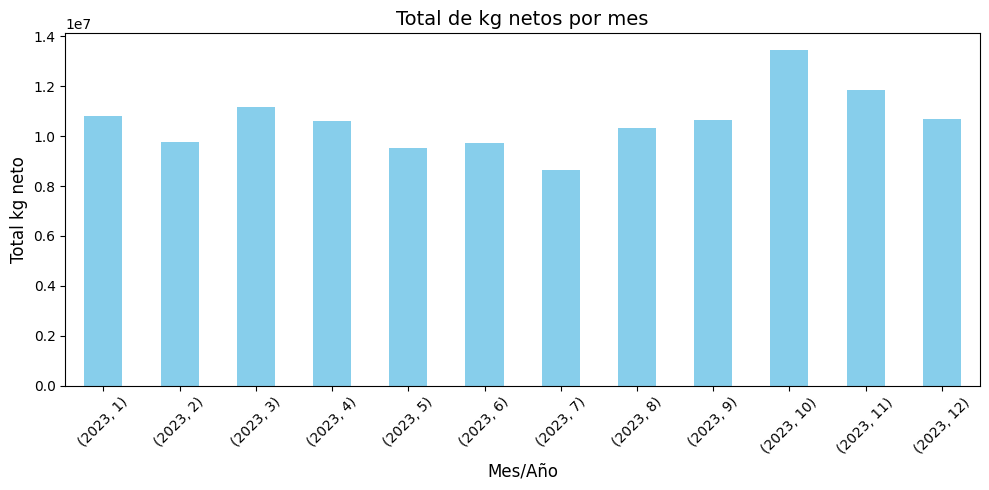

In [18]:
kg_mensual = df.groupby(["año","mes"])['KGS NETO'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total de kg netos por mes', fontsize=14)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Total kg neto', fontsize=12)
plt.xticks(rotation=45)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

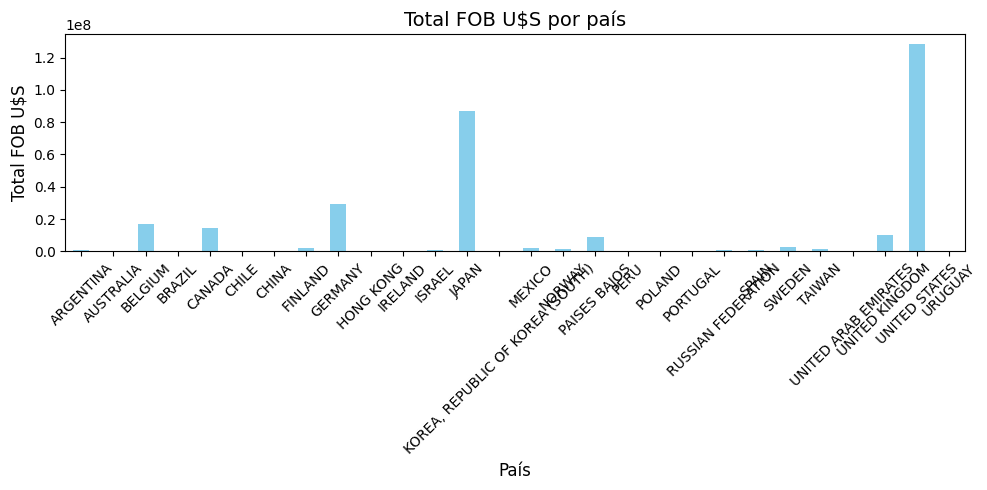

In [19]:
kg_mensual = df.groupby('PAIS DESTINO')['TOTAL FOB U$S'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total FOB U$S por país', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total FOB U$S', fontsize=12)
plt.xticks(rotation=45)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

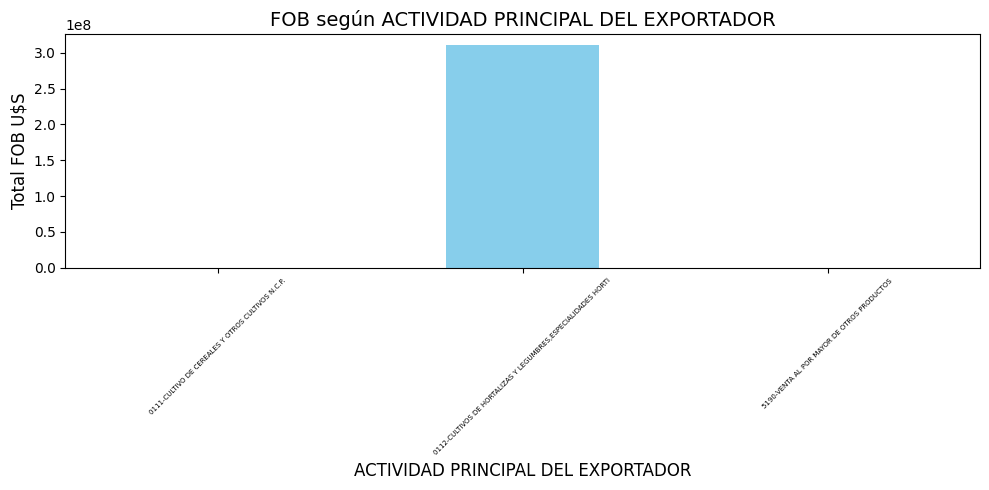

In [20]:
kg_mensual = df.groupby('ACTIVIDAD PRINCIPAL DEL EXPORTADOR')['TOTAL FOB U$S'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('FOB según ACTIVIDAD PRINCIPAL DEL EXPORTADOR', fontsize=14)
plt.xlabel('ACTIVIDAD PRINCIPAL DEL EXPORTADOR', fontsize=12)
plt.ylabel('Total FOB U$S', fontsize=12)
plt.xticks(rotation=45, fontsize = 5)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

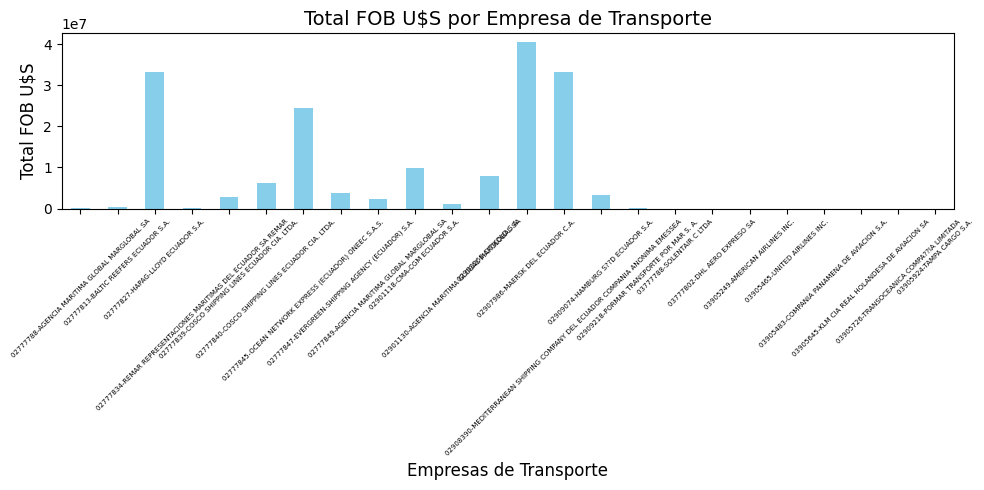

In [21]:
kg_mensual = df.groupby('EMPRESA TRANSPORTE')['TOTAL FOB U$S'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total FOB U$S por Empresa de Transporte', fontsize=14)
plt.xlabel('Empresas de Transporte', fontsize=12)
plt.ylabel('Total FOB U$S', fontsize=12)
plt.xticks(rotation=45, fontsize = 5)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

In [22]:
df1["año"] = df["FECHA DESPACHO"].dt.year
df1["mes"] = df["FECHA DESPACHO"].dt.month
df1["dia"] = df["FECHA DESPACHO"].dt.day
df1["dia_semana"] = df["FECHA DESPACHO"].dt.weekday

In [23]:
print(df1["PAIS DESTINO"])

0                JAPAN
1              GERMANY
2       UNITED KINGDOM
3        UNITED STATES
4       UNITED KINGDOM
             ...      
6697            CANADA
6698             JAPAN
6699             JAPAN
6700            TAIWAN
6701           GERMANY
Name: PAIS DESTINO, Length: 6702, dtype: object


In [24]:
df1['PAIS DESTINO'] = df1['PAIS DESTINO'].apply(lambda x: hash(x))

In [25]:
#Codigo_Pais = {value: key for key, value in enumerate(df1["PAIS DESTINO"].unique())}

In [26]:
#df1["PAIS DESTINO"] = df1["PAIS DESTINO"].map(Codigo_Pais)

In [27]:
df1["KGS NETO"] = df1["KGS NETO"] * df1["ITEM"]

In [28]:
X = df1[["año", "mes", "dia","dia_semana","KGS NETO", "PAIS DESTINO","FOB U$S"]]
y = df1["FOB U$S"]

In [29]:
print(X.shape)

(6702, 7)


In [30]:
df1 = df1.drop("FECHA DESPACHO", axis=1, errors='ignore')

In [31]:
print(y.head())


0    27361.81
1    24429.60
2    60000.00
3    60000.00
4    60000.00
Name: FOB U$S, dtype: float64


In [32]:
print(entradallm.head())


           PAIS DESTINO   FOB U$S  KGS_TOTAL   AÑO  SEMANA
98               MEXICO  21605.28    20000.0  2023       1
323               JAPAN  29930.39    15120.0  2023       1
284               JAPAN  36779.39    12600.0  2023       1
301               JAPAN  29930.39    15120.0  2023       1
294  RUSSIAN FEDERATION   21475.8    22140.0  2023       1


In [33]:
print(Valores_reales.head())

       PAIS DESTINO   FOB U$S  KGS_TOTAL   AÑO  SEMANA
6141        GERMANY  25116.00    19320.0  2023      52
6371        GERMANY  60000.00    21200.0  2023      52
6531         SWEDEN  60000.00    21200.0  2023      52
6647  UNITED STATES  19841.58    20000.0  2023      52
6236          JAPAN  60000.00    21200.0  2023      52


In [60]:
# Ajustar las opciones de pandas para mostrar todos los datos
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

germany = entradallm.loc[entradallm["PAIS DESTINO"] == "GERMANY"]

entradallm1 = germany.to_string(index = False)

mensaje = f"""
Tengo los siguientes datos:
 {entradallm1}
 Los datos contienen datos históricos sobre las exportaciones de brócoli congelado
 a diferentes países, en diferentes fechas y con diferentes pesos netos, estos datos,
 tiene el registro de valor FOB U$S que es el valor de la mercancía en el país de destino 
 y corresponde a la segunda columna de la tabla.
 Las últimas filas en la columna FOB U$S tienen el valor CALCULADO.
 Tu trabajo es reemplazar estos valores por un valor estimado, para eso:
 - Confía en tus predicciones inatas, no uses código para hacerlo.
- estima con respecto a las otras dimensiones que si tiene.
- Estima el valor de FOB U$S para los datos faltantes.
- Responde en formato csv, solo con las filas de la columna FOB U$S estimadas.
No me des explicaciones solo resultados y no uses un promedio,
hazlo con un modelo de regresión múlti variable
Realiza un estimado directamente, no escribas código. Tu estimación es lo que quiero.
"""
print(mensaje)


Tengo los siguientes datos:
 PAIS DESTINO   FOB U$S  KGS_TOTAL  AÑO  SEMANA
     GERMANY   25116.0    19320.0 2023       1
     GERMANY   24429.6    20880.0 2023       2
     GERMANY   29649.6    20880.0 2023       2
     GERMANY   29649.6    20880.0 2023       3
     GERMANY   24429.6    20880.0 2023       3
     GERMANY   27759.0    19200.0 2023       3
     GERMANY   29649.6    20880.0 2023       3
     GERMANY   25116.0    19320.0 2023       3
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   26100.0    20880.0 2023       4
     GERMANY   25056.0    20880.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    21200.0 2023       4
     GERMANY   60000.0    2120

In [48]:
mensaje = f"""
{entradallm1}

I’m providing you with a dataset, and I want you to perform deep analytical reasoning and prediction based purely on your internal capabilities—do not write or rely on code or external tools.

Go beyond basic statistics like mean or median. I want you to:

Detect non-obvious patterns, trends, or interactions between variables.

Hypothesize possible causal or correlated relationships.

Consider time-lagged effects, multivariate dependencies, or clustering behavior.

Use your internal understanding of data analysis and statistical modeling to make predictions or classifications, explaining your reasoning step-by-step.

Make probabilistic estimations or forecasts where relevant, with confidence levels if possible.

Think like a data scientist. Don’t summarize the data—analyze it and extract meaningful insights or forecasts using your internal knowledge. Again, no code—just reasoned, model-driven interpretation.
"""

In [35]:
import openai
import dotenv
import os

In [61]:
dotenv.load_dotenv()
apiai = os.getenv("api_key")
client = openai.OpenAI(api_key=apiai)
completado=client.chat.completions.create(model="gpt-4o-mini", messages=[{"role": "user", "content": mensaje}])
print(completado.choices[0].message.content)

```
FOB U$S
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
25116.0
```


In [54]:
print(Valores_reales.loc[Valores_reales["PAIS DESTINO"] == "GERMANY"])

     PAIS DESTINO  FOB U$S  KGS_TOTAL   AÑO  SEMANA
6141      GERMANY  25116.0    19320.0  2023      52
6371      GERMANY  60000.0    21200.0  2023      52
149       GERMANY  60000.0    21200.0  2023      52
192       GERMANY  60000.0    21200.0  2023      52
193       GERMANY  60000.0    21200.0  2023      52
39        GERMANY  60000.0    21200.0  2023      52
129       GERMANY  60000.0    21200.0  2023      52
101       GERMANY  60000.0    21200.0  2023      52
130       GERMANY  60000.0    21200.0  2023      52
131       GERMANY  60000.0    21200.0  2023      52
134       GERMANY  60000.0    21200.0  2023      52
55        GERMANY  60000.0    21200.0  2023      52
13        GERMANY  60000.0    21200.0  2023      52
231       GERMANY  60000.0    21200.0  2023      52
43        GERMANY  60000.0    21200.0  2023      52
53        GERMANY  60000.0    21200.0  2023      52
271       GERMANY  60000.0    21200.0  2023      52
312       GERMANY  60000.0    21200.0  2023      52
220       GE

In [ ]:
#donde: PAIS DESTINO= GERMANY, PESO=15000, para la semana 15 del año 2024
#Actualizado